Import dependencies

In [338]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

Access the dataset

In [337]:


Df=pd.read_csv ('/content/brain_stroke.csv')
Df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


Statistical information

In [ ]:
Df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [ ]:
Df.shape

(4981, 11)

In [ ]:
Df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Check missing values and NaN values

In [ ]:
Df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
Df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
Df.head ()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


Correlations between all features

In [ ]:
Df.corr ()

<ipython-input-212-0d567c8447e9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Df.corr ()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.278120,0.264852,0.236763,0.373703,0.246478
hypertension,0.278120,1.000000,0.111974,0.170028,0.158762,0.131965
heart_disease,0.264852,0.111974,1.000000,0.166847,0.060926,0.134610
avg_glucose_level,0.236763,0.170028,0.166847,1.000000,0.186348,0.133227
bmi,0.373703,0.158762,0.060926,0.186348,1.000000,0.056926
stroke,0.246478,0.131965,0.134610,0.133227,0.056926,1.000000


Count the all cases

In [ ]:
Df['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

Probability distribution of stroke occurs

In [ ]:
from scipy.stats import poisson

Data=Df ['stroke']

#calculate Lembda value 
Lembda=np.mean (Data)
X=np.arange (1,np.max (Data)+2)
print ('Lembda:',Lembda)

Lembda: 0.049789198956032926


Cases that occurs exactly or equal to the 0.049...(lembda)
Number of occurrances are X it takes one instance per lembda.

In [ ]:
#calculate  probability  for each stroke
Probab=poisson.pmf (X,Lembda)
Probab

array([0.04737094, 0.00117928])

Text(0, 0.5, 'Probability')

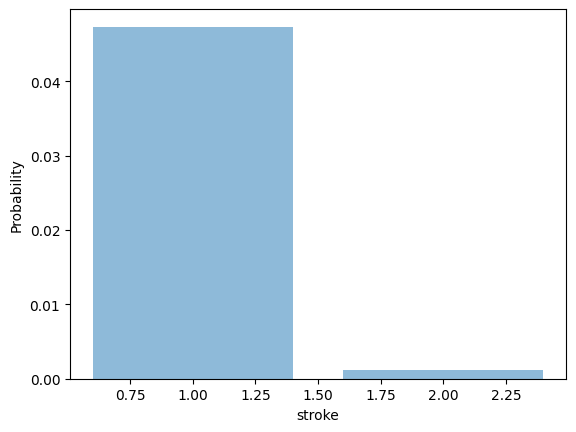

In [ ]:
#plot poisson 
plt.bar (X,Probab,align="center",alpha=0.5)
plt.xlabel ('stroke')
plt.ylabel  ('Probability')

Cases are less than or equal to 0.049..(lembda) occurances

In [ ]:
#calculate  probability  for each stroke
Probab_cdf=poisson.cdf (X,Lembda)
Probab_cdf

array([0.9988009 , 0.99998018])

Text(0, 0.5, 'Probability')

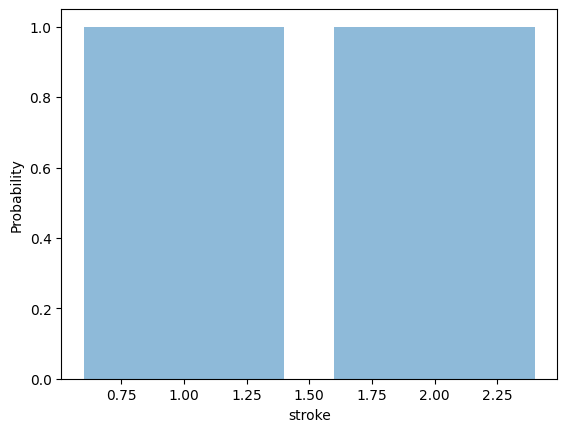

In [ ]:
#plot poisson 
plt.bar (X,Probab_cdf,align="center",alpha=0.5)
plt.xlabel ('stroke')
plt.ylabel  ('Probability')

Distribution of dataset and correlation

<ipython-input-339-64fc38215a20>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Df.corr ())


<Axes: >

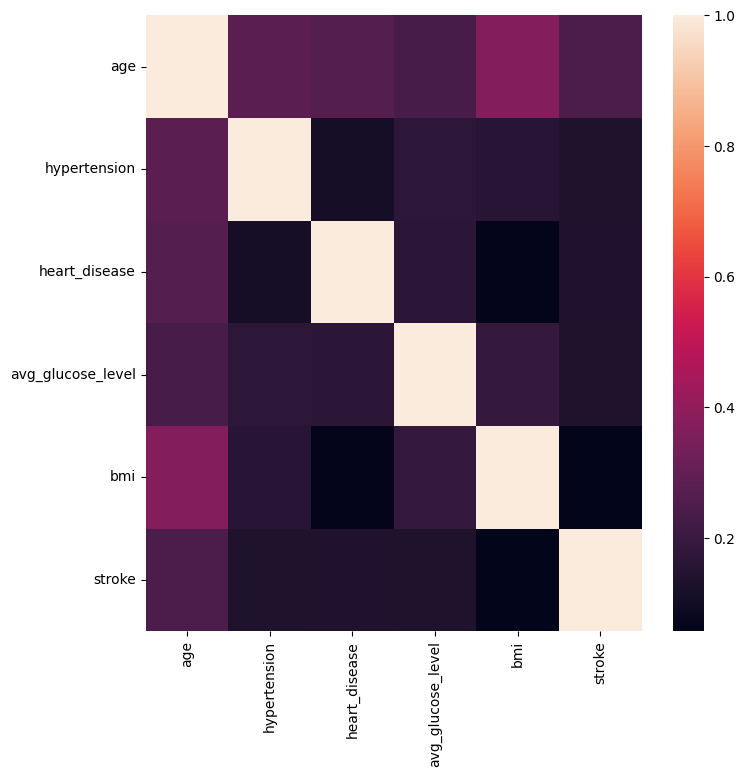

In [339]:
plt.figure(figsize =(8,8))
sns.heatmap(Df.corr ())

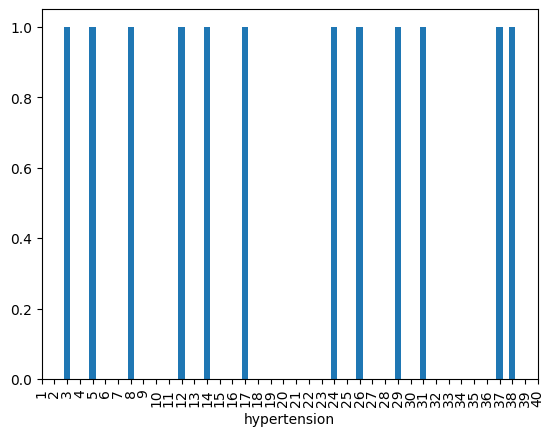

<Figure size 2000x2000 with 0 Axes>

In [ ]:
fig,ax=plt.subplots ()
plt.figure(figsize =(20,20))
Df ['hypertension'].plot(ax=ax,kind='bar', xlabel='hypertension')

ax.set_xlim (1,40)

plt.show()

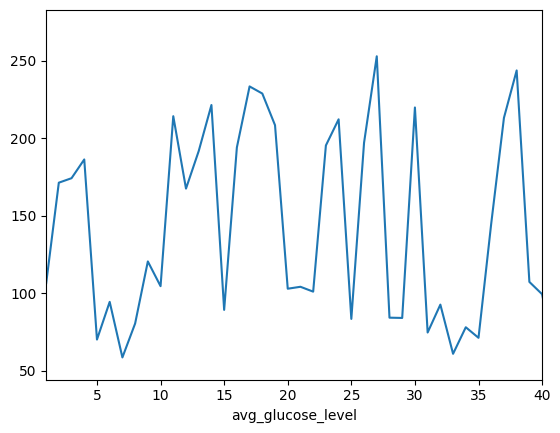

<Figure size 2000x2000 with 0 Axes>

In [ ]:
fig,ax=plt.subplots ()
plt.figure(figsize =(20,20))
Df ['avg_glucose_level'].plot(ax=ax,kind='line', xlabel='avg_glucose_level')

ax.set_xlim (1,40)

plt.show()

Features contain unique values in each column

In [340]:
Df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
Df['smoking_status'].value_counts()

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

In [ ]:
smoke={"smoke_status": {"never smoked":1838,"Unknown":1500,"formerly smoked":867,"smokes":776,}}
smoke

{'smoke_status': {'never smoked': 1838,
  'Unknown': 1500,
  'formerly smoked': 867,
  'smokes': 776}}

In [ ]:
Df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

Convert the categorical data into numericals 
Use the preprocessing label encoder

In [324]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
  

Df['Residence_type']= label_encoder.fit_transform(Df['Residence_type'])
 
Df['Residence_type'].unique()

array([1, 0])

In [325]:

Df['smoking_status']= label_encoder.fit_transform(Df['smoking_status'])
Df ['smoking_status'].unique ()

array([1, 2, 3, 0])

In [326]:

Df['work_type']= label_encoder.fit_transform(Df['work_type'])

Df['work_type'].unique()

array([1, 2, 0, 3])

In [327]:

Df['ever_married']= label_encoder.fit_transform(Df['ever_married'])

Df['ever_married'].unique()

array([1, 0])

In [329]:

Df['gender']= label_encoder.fit_transform(Df['gender'])

Df['gender'].unique()

array([1, 0])

All categorical features converted into numerical values.See top five rows.

In [ ]:
Df.head ()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


Distribution of dataset

<ipython-input-42-4e8106cda30f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (Df)


<Axes: ylabel='Density'>

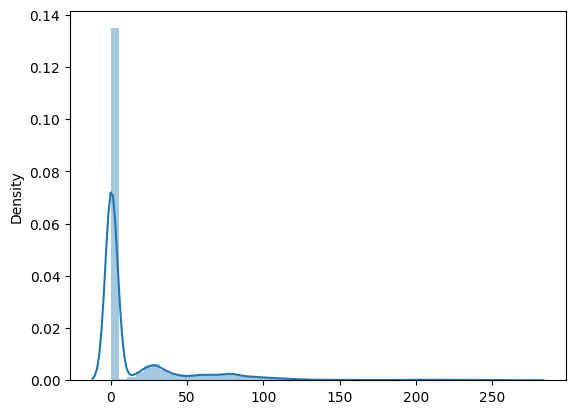

In [ ]:
sns.distplot (Df)

Above👆 distribution is positively distribution.

Also we can see the hist. distribution  plot of all feature .

<Axes: ylabel='Count'>

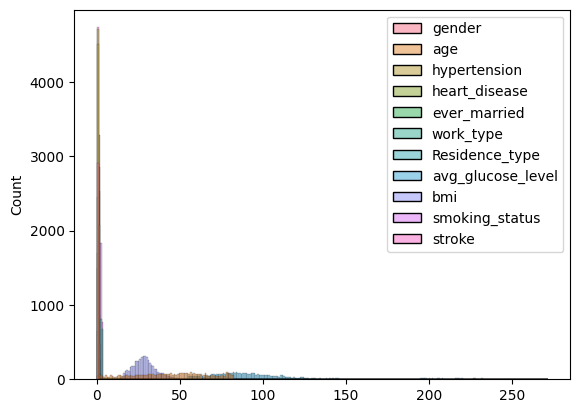

In [ ]:
sns.histplot (Df)

Relationship of all features.

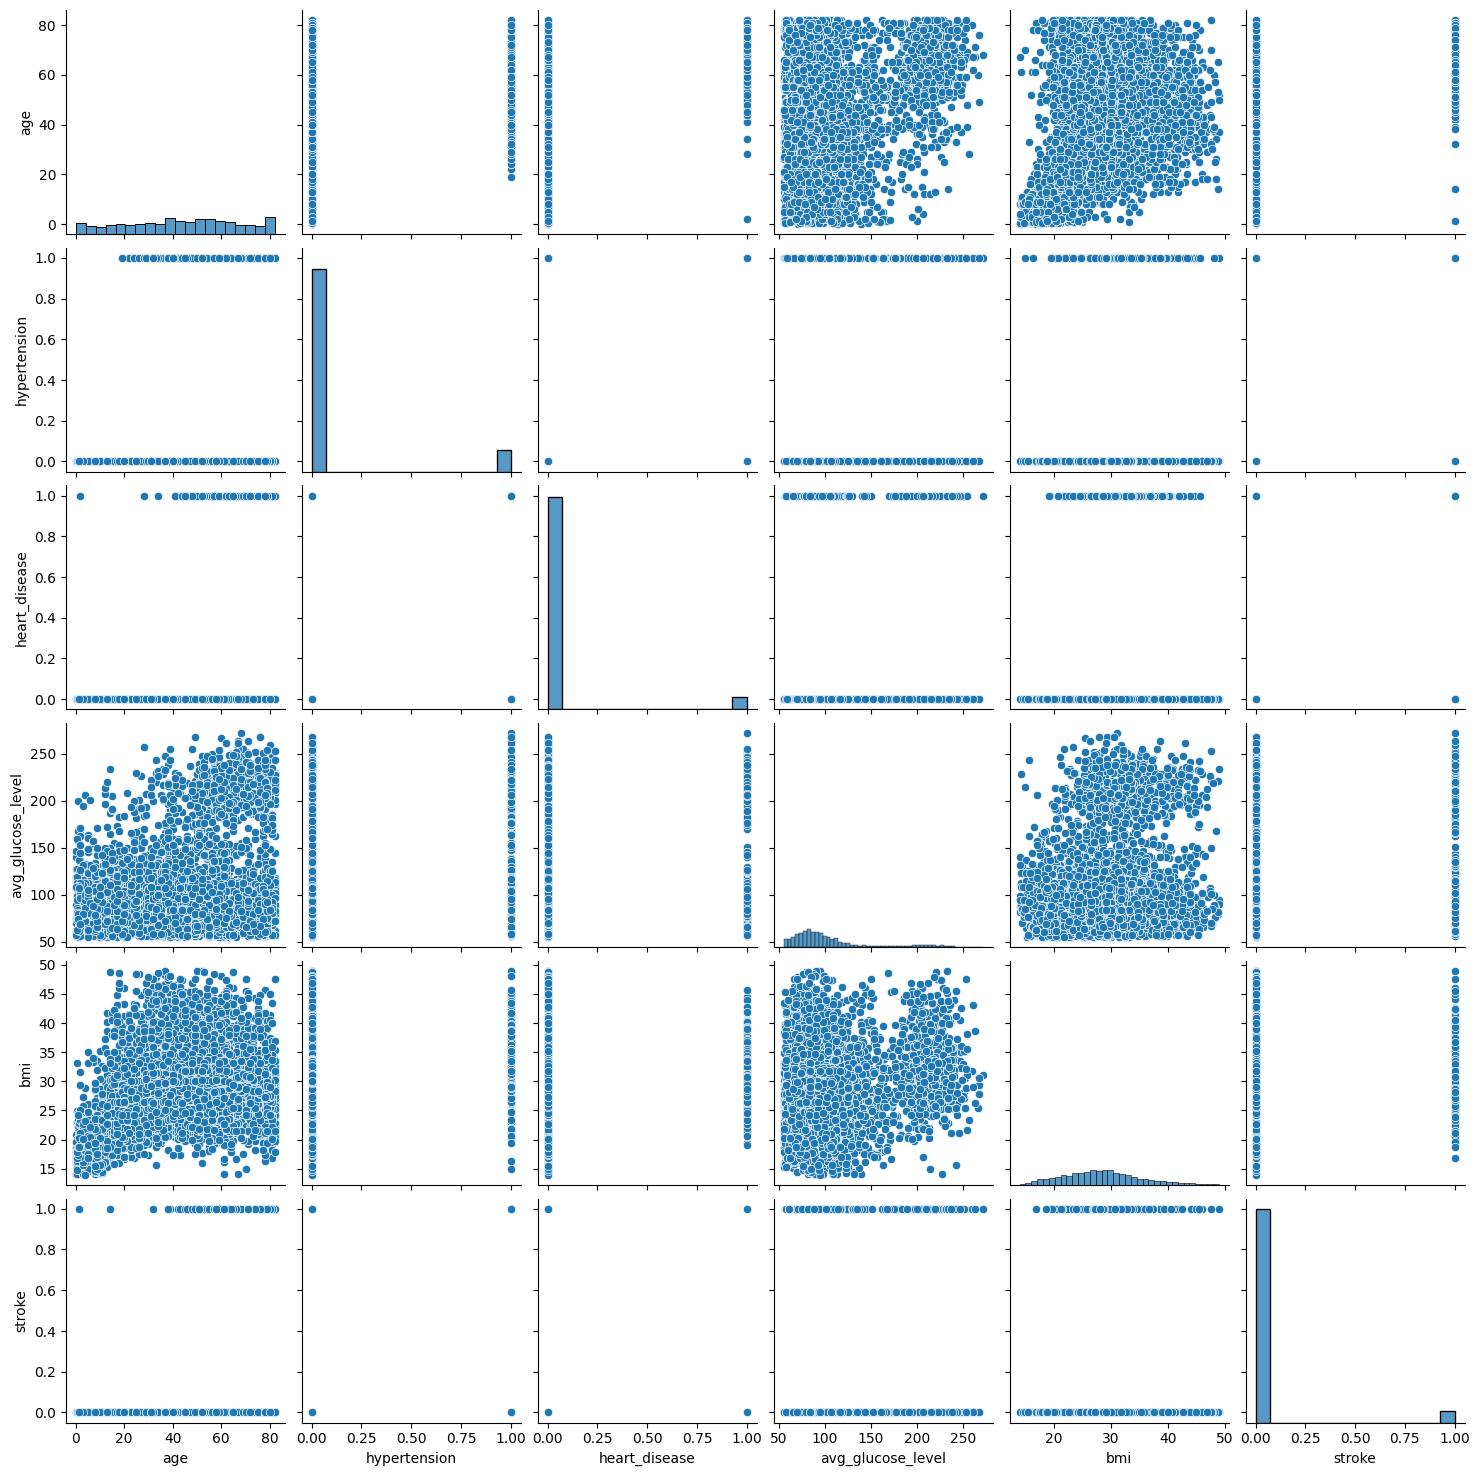

In [344]:
sns.pairplot (Df)

Detecting the outliers

<Axes: >

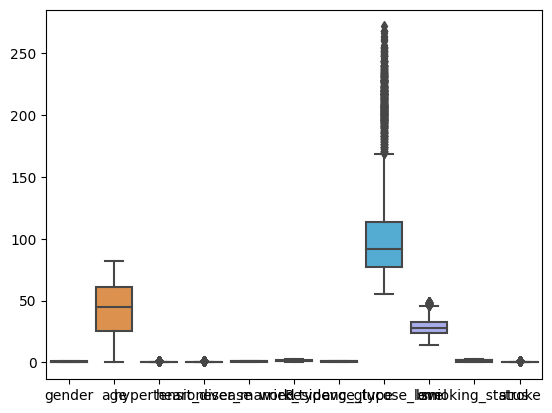

In [ ]:
sns.boxplot(Df)

The avg_glucose_level is unwanted feature and I will drop it later.

<Axes: >

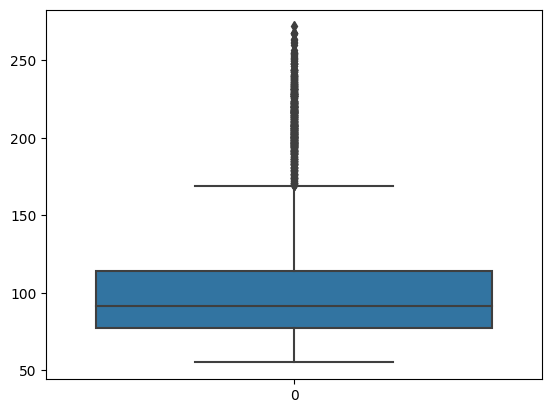

In [ ]:
sns.boxplot(Df ['avg_glucose_level'])

In [345]:
Df.shape

(4981, 11)

In [ ]:
Df.mean ()

<ipython-input-26-eb745b953baf>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Df.mean ()


age                   43.419859
hypertension           0.096165
heart_disease          0.055210
avg_glucose_level    105.943562
bmi                   28.498173
stroke                 0.049789
dtype: float64

Choose and create dependent and independent variables

In [330]:


x=Df.drop(columns="stroke",axis=1)
y=Df['stroke']

x

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
0,1,0,1,1,1,1,1
1,1,0,1,1,1,0,2
2,0,0,0,1,1,1,3
3,0,1,0,1,2,0,2
4,1,0,0,1,1,1,1
...,...,...,...,...,...,...,...
4976,1,0,0,0,1,0,1
4977,1,0,0,1,1,1,3
4978,0,1,0,1,0,0,3
4979,1,0,0,1,1,0,3


Splitting the dataset

In [331]:
from sklearn.model_selection import train_test_split 

train_x, test_x, train_y,test_y = train_test_split  (x,y, test_size=10,random_state=0)
test_x

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
1366,0,0,0,1,0,0,1
4398,0,0,0,1,2,1,2
3188,1,0,0,0,2,0,0
4891,0,0,0,0,1,1,3
4156,1,0,0,0,3,0,0
398,1,0,1,1,2,0,3
1329,1,0,0,1,1,1,2
1721,0,0,0,1,2,1,3
3798,1,0,0,0,3,1,0
2397,0,0,0,0,3,1,0


Detecting the less important  features and remove theme.

VarianceThreshold

In [ ]:

from sklearn.feature_selection  import VarianceThreshold 

selector =VarianceThreshold  (threshold =5)
selector

VarianceThreshold(threshold=5)

In [ ]:
selector.fit_transform(train_x)

array([[ 20.  ,  79.53,  26.5 ],
       [  2.  , 102.92,  17.6 ],
       [ 59.  ,  96.25,  23.3 ],
       ...,
       [ 56.  , 224.63,  42.8 ],
       [ 57.  , 107.49,  29.5 ],
       [  9.  ,  90.22,  18.7 ]])

This showing the variablesame that are not helpful for prediction  (as true)

In [ ]:
selector.get_support()

array([False,  True, False, False, False, False, False,  True,  True,
       False])

There are three features that are not helpful

In [ ]:
train_x.head ()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4963,0,20.0,0,0,0,0,0,79.53,26.5,2
4035,0,2.0,0,0,0,3,1,102.92,17.6,0
1855,1,59.0,0,0,1,0,0,96.25,23.3,1
3432,0,75.0,0,0,1,2,1,60.60,40.4,3
2285,1,71.0,0,0,1,0,1,56.12,24.7,0


Dropping the features

In [323]:
Df.drop (['avg_glucose_level','age','bmi'],axis=1,inplace =True)

In [346]:
Df.shape

(4981, 11)

Use the Logistic Regression

In [332]:
Lg=LogisticRegression  ()
Lg.fit (train_x,train_y)

LogisticRegression()

In [333]:
Prediction_lg=Lg.predict(test_x)
Prediction_lg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Accuracy_score of the model

In [334]:
accuracy_score (test_y,Prediction_lg)

1.0

Use the Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [335]:
Dt=DecisionTreeClassifier ()
Dt.fit (train_x,train_y)

DecisionTreeClassifier()

In [ ]:
Prediction_Dt=Dt.predict(test_x)
Prediction_Dt

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Accuracy_score

In [336]:
accuracy_score (test_y,Prediction_Dt)

1.0

This helps in reducing the dimensions

PCA

In [ ]:
from sklearn import decomposition

In [ ]:
Pca=decomposition.PCA()

In [ ]:
Pca.n_components = 8

In [ ]:
Pca_data=Pca.fit_transform(train_x)
Pca_data

array([[-2.97420104e+01,  1.90618627e+01,  1.11553469e+00, ...,
         4.58395584e-01, -3.48703624e-01,  4.85884277e-01],
       [-9.71194089e+00,  4.14337504e+01, -6.17010830e+00, ...,
        -5.48209625e-01, -4.66551617e-01, -6.20367553e-02],
       [-7.32411979e+00, -1.62402535e+01, -6.75169993e+00, ...,
         5.48928460e-01,  6.07105133e-01, -1.07719889e-01],
       ...,
       [ 1.19617404e+02,  4.71872485e+00,  1.10145222e+01, ...,
        -5.18671458e-01, -5.10225317e-01, -1.87781763e-01],
       [ 3.66705885e+00, -1.31879645e+01, -5.43135558e-01, ...,
        -4.33411698e-01,  6.41190369e-01, -1.62009665e-01],
       [-2.11398204e+01,  3.24548967e+01, -5.68666246e+00, ...,
         4.52378056e-01, -5.45856898e-01,  3.38929614e-02]])

In [ ]:
Pca.explained_variance_ratio_

array([7.98616905e-01, 1.85506714e-01, 1.49747673e-02, 4.27647918e-04,
       1.92408741e-04, 9.63484070e-05, 9.27032146e-05, 4.44652540e-05])

Feature importance

In [ ]:
from sklearn.linear_model import LinearRegression 

model=LinearRegression()
model.fit (x,y)

LinearRegression()

In [ ]:
importance =model.coef_
importance

array([ 0.00018582,  0.00273294,  0.04216406,  0.05205574, -0.03694484,
        0.00910571,  0.00566454,  0.00032519, -0.00082401, -0.00431661])

Features :0,Score:0.000186
Features :1,Score:0.002733
Features :2,Score:0.042164
Features :3,Score:0.052056
Features :4,Score:-0.036945
Features :5,Score:0.009106
Features :6,Score:0.005665
Features :7,Score:0.000325
Features :8,Score:-0.000824
Features :9,Score:-0.004317


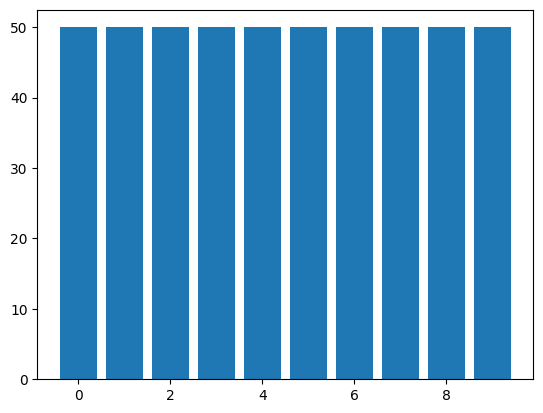

In [ ]:
import matplotlib.pyplot as plt 

for i,v in enumerate  (importance ):
  print  ('Features :%0d,Score:%5f' % (i , v))

plt.bar ([x for x in range (len (importance))], height =50)
plt.show ()

Variable  transformation

<Figure size 1000x800 with 0 Axes>

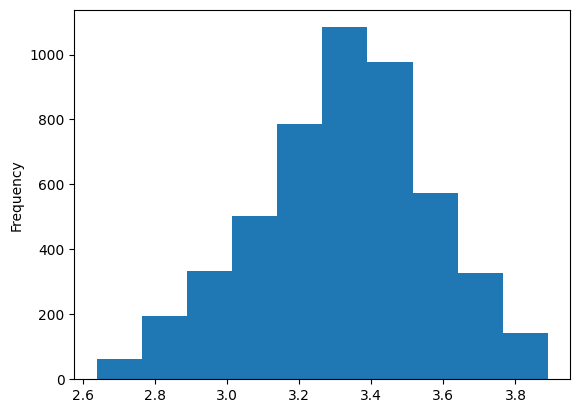

<Figure size 1000x800 with 0 Axes>

In [ ]:
np.log (Df['bmi']).plot.hist ()
plt.figure(figsize =(10,8))

<Axes: ylabel='Frequency'>

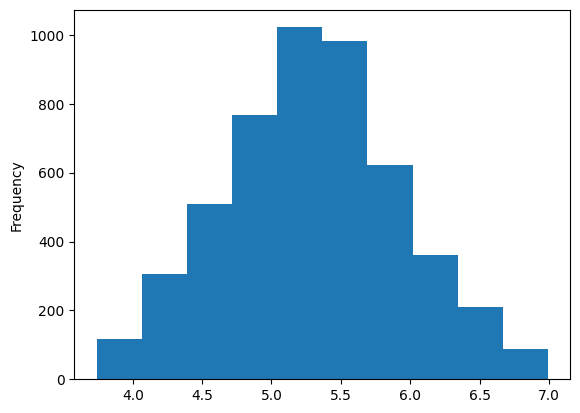

In [ ]:
np.sqrt(Df['bmi']).plot.hist ()

<Axes: ylabel='Frequency'>

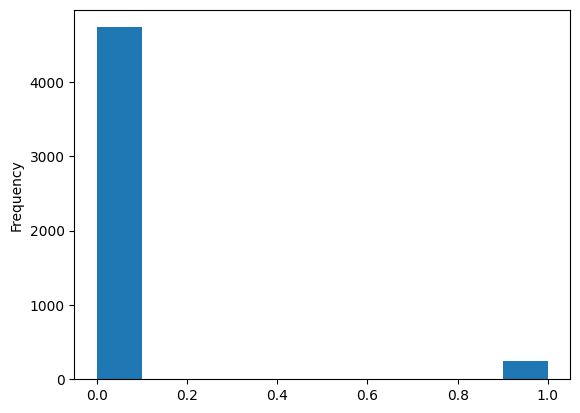

In [352]:
(Df['stroke']).plot.hist ()

<Axes: ylabel='Frequency'>

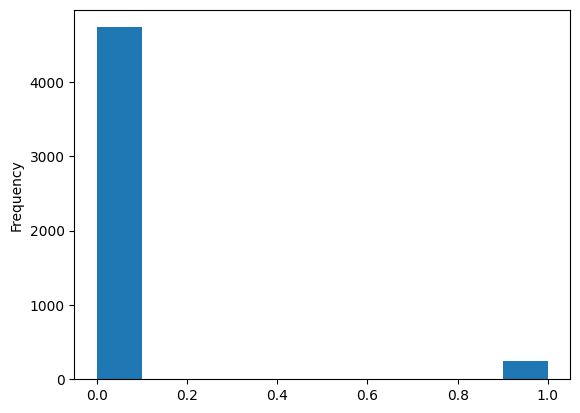

In [347]:
np.sqrt(Df['stroke']).plot.hist ()